# Analisis Hubungan Antara Jumlah Sitasi Dengan Jumlah Paper Dosen Depilkom UPI
- Data diambil dari Google Scholar menggunakan python dengan output JSON. Yang kemudian diconvert kedalam CSV
- Data tidak hanya berisi dosen Depilkom UPI dikarenakan keterbatasan query search pada Scholar, dan tidak adanya label/pembeda paper dari Depilkom
- Tujuan dari analisis ini adalah untuk melihat hubungan apakah jumlah pembuatan paper berpengaruh dengan jumlah sitasi

## Import data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('scholar.csv')
df.head()

,Title,Author1,Author2,Author3,Author4,Author5,Link,Cited By
0,… of expertise to improve science education an...,BL Putro,NaN,NaN,NaN,NaN,https://ieeexplore.ieee.org/abstract/document/...,3
1,Enhanced Digital Library with Book Recommendat...,E Junaeti,NaN,NaN,NaN,NaN,http://www.journaleet.in/index.php/jeet/articl...,0
2,Natural Language Processing and Levenshtein Di...,LS Riza,EF Rahman,NaN,NaN,NaN,https://ejournal.upi.edu/index.php/JCS/article...,2
3,Monitoring system with two central facilities ...,W Wahyudin,EP Nugroho,NaN,NaN,NaN,https://ejournal.upi.edu/index.php/ijost/artic...,18
4,The application of ADDIE model in developing a...,EF Rahman,NaN,NaN,NaN,NaN,https://ieeexplore.ieee.org/abstract/document/...,8


## Subsetting dataframe
### Subset kolom Author dan Jumlah sitasi

In [2]:
# Filter nilai kosong
df2 = df[df['Author1'].notna() == True]

# Subsetting
df3 = df2[['Author1', 'Author2', 'Author3', 'Author4', 'Author5', 'Cited By']]
df3

,Author1,Author2,Author3,Author4,Author5,Cited By
0,BL Putro,NaN,NaN,NaN,NaN,3
1,E Junaeti,NaN,NaN,NaN,NaN,0
2,LS Riza,EF Rahman,NaN,NaN,NaN,2
3,W Wahyudin,EP Nugroho,NaN,NaN,NaN,18
4,EF Rahman,NaN,NaN,NaN,NaN,8
...,...,...,...,...,...,...
668,Y Wibisono,ML Khodra,NaN,NaN,NaN,22
669,ML Khodra,Y Wibisono,NaN,NaN,NaN,1
670,Y Wibisono,ML Khodra,NaN,NaN,NaN,0
671,B Mulyanti,Y Wibisono,NaN,NaN,NaN,5


## Penggabungan data
### Hal ini dilakukan karena kita perlu menggabungkan value yang sama dari setiap kolom (contoh: E Junaeti terdapat pada Author1 dan juga kolom Author2) agar bisa mendapatkan jumlah sitasi dan jumlah papernya

In [3]:
dfAuthor = [[] for i in range(5)]
j = 1
for index in range(5):
    if(index == 0):
        dfAuthor[index] = df3[[f'Author{j}', 'Cited By']]
        dfAuthor[index] = dfAuthor[index][dfAuthor[index][f'Author{j}'].notna() == True]
        
    else:
        dfAuthor[index] = df3[[f'Author{j}', 'Cited By']]
        dfAuthor[index] = dfAuthor[index].rename(columns={f'Author{j}':"Author1"})
        dfAuthor[index] = dfAuthor[index][dfAuthor[index]['Author1'].notna() == True]
    j += 1

In [4]:
# Append
for i in range(4):
    dfAuthor[0] = dfAuthor[0].append(dfAuthor[i+1])

dfAuthor[0]

,Author1,Cited By
0,BL Putro,3
1,E Junaeti,0
2,LS Riza,2
3,W Wahyudin,18
4,EF Rahman,8
...,...,...
202,AS Surur,2
451,E Junaeti,24
575,ND Ardi,8
581,M Fahsi,2


## Menjumlahkan semua jumlah sitasi dari paper dosen yang sama

In [5]:
dfAuthor[0]["Count"] = 1
dfAuthor[0] = dfAuthor[0].groupby(by=["Author1"], as_index = False).sum()

# Data dosen yang disajikan dalam visualisasi hanyalah dosen yang mempunyai lebih dari 5 paper
dfAuthor[0] = dfAuthor[0][dfAuthor[0]['Count'] > 5]

dfAuthor[0]

,Author1,Cited By,Count
24,A Wahyudin,48,34
30,AG Abdullah,83,10
51,BL Putro,20,12
64,D Rohendi,14,7
72,D Wahyudin,225,70
82,E Junaeti,97,20
86,E Nugraha,2,7
87,E Piantari,52,11
90,EA Nurdin,26,17
93,EF Rahman,77,17


## Visualisasi Data Menggunakan Scatter Plot

Text(0, 0.5, 'Jumlah Paper')

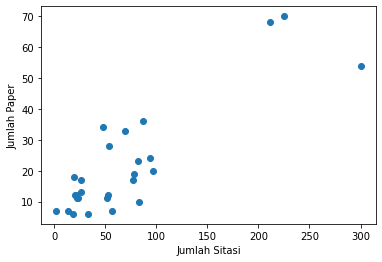

In [6]:
import matplotlib.pyplot as plt

plt.scatter(dfAuthor[0]['Cited By'], dfAuthor[0]['Count'])
plt.xlabel('Jumlah Sitasi')
plt.ylabel('Jumlah Paper')